# Regressão Linear com scipy e statsmodel 

Este tutorial mostra exemplos simples de definição de regressão usando duas bibliotecas diferentes. No scipy a implementação é de mais baixo nível (e talvez mais didática), tratando no código os parâmetros e a função de previsão. O statsmodel é usado para análises estatísticas e mostra mais informações úteis sobre o modelo. Os dados usados são fictícios associando a idade de zumbis ao seus tempos de recuperação (Zombie Health).

Importando o arquivo CSV com o Pandas.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('zombie-health-age-days-recovery.csv')
df.head(10)

name  age  days_recovery
0        Rot Donnadd   43              9
1          Pid Mught   38              7
2      Thulk Lebbimp   63             10
3    Bouvossam Damme   71             13
4          Pirg Zall   48              7
5  Nullon Rackindock   23              5
6    Shor Splitturch   35              7
7         Ger Ackeng   66             11
8      Gleldo Shruck   45              8
9      Nadross Pilch   60              8

## Scatter plot da Idade x Dias de Recuperação

<AxesSubplot:xlabel='age', ylabel='days_recovery'>

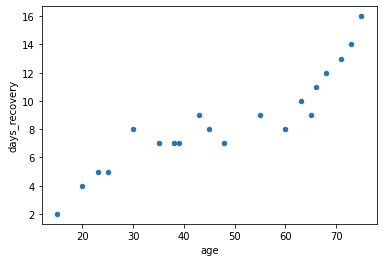

In [2]:
df.plot.scatter(x='age', y='days_recovery')

## Estimando a Regressão Linear usando Least Squares

In [3]:
from scipy import stats
x = df['age']
y = df['days_recovery']
a, b, r, p, std_err = stats.linregress(x, y)

## Plotando a função linear estimada x dados da amostra

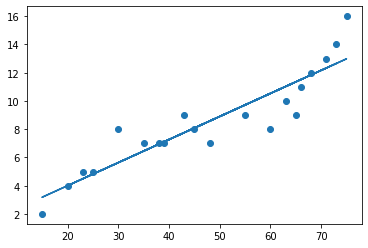

In [4]:
def estimate_y(x):
  return a * x + b

df['y_estimated'] = df['age'].apply(estimate_y)

plt.figure()
plt.plot(df['age'], df['y_estimated'])
plt.scatter(df['age'], df['days_recovery'])
plt.show()

## Calculando o R2

In [8]:
print("R-squared: %f" % r**2)

R-squared: 0.836479


# Regressão usando o statsmodel

In [54]:
# cria o modelo e imprime o sumário
from statsmodels.formula.api import ols

model = ols("days_recovery ~ age", data=df)
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          days_recovery   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     92.08
Date:                Wed, 13 Oct 2021   Prob (F-statistic):           1.68e-08
Time:                        13:14:20   Log-Likelihood:                -34.472
No. Observations:                  20   AIC:                             72.94
Df Residuals:                      18   BIC:                             74.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7319      0.875      0.836      0.414      -1.107       2.571
age            0.1634      0.017      9.596      0.000       0.128       0.199
==============================================================================
Omnibus:                        0.502   Durbin-Watson:                   2.394
Prob(Omnibus):                  0.778   Jarque-Bera (JB):                0.112
Skew:                           0.183   Prob(JB):                        0.946
Kurtosis:                       2.976   Cond. No.                         141.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# criando um dataframe com novas idades aleatórias para se estimar os dias de recuperação com base no modelo criado
novas_idades = np.floor(np.random.rand(5) * 100)
df_idades = pd.DataFrame.from_dict({'age': novas_idades})

df_idades

age
0  52.0
1   4.0
2  38.0
3   5.0
4  52.0

In [53]:
# gera as previsões
response.predict(exog=dict(age=df_idades))

0    9.228061
1    1.385427
2    6.940626
3    1.548815
4    9.228061
dtype: float64